In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir('./dataset'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [2]:
# 选择几种花进行分类
daisy_dir = './dataset/daisy'
rose_dir = './dataset/rose'
sunflower_dir = './dataset/sunflower'
tulip_dir = './dataset/tulip'

In [3]:
import cv2
X = []
y_label = []
imgsize = 150
# 定义一个函数读入花的图片
def training_data(label, data_dir):
    print("正在读入：", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (imgsize, imgsize))
        X.append(np.array(img))
        y_label.append(str(label))

# 读入目录中的图片
training_data('daisy', daisy_dir)
training_data('rose', rose_dir)
training_data('sunflower', sunflower_dir)
training_data('tulip', tulip_dir)

正在读入： ./dataset/daisy
正在读入： ./dataset/rose
正在读入： ./dataset/sunflower
正在读入： ./dataset/tulip


In [5]:
from sklearn.preprocessing import LabelEncoder # 导入标签编码工具
from keras.utils.np_utils import to_categorical # 导入One-hot编码工具
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # 标签编码
y = to_categorical(y, 10) # 将标签转换为One-hot编码
X = np.array(X) # 将X从列表转换为张量数组
X = X/255 # 将X张量归一化

d:\Anaconda3\envs\Vuean_ML\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Anaconda3\envs\Vuean_ML\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Anaconda3\envs\Vuean_ML\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\Anaconda3\envs\Vuean_ML\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


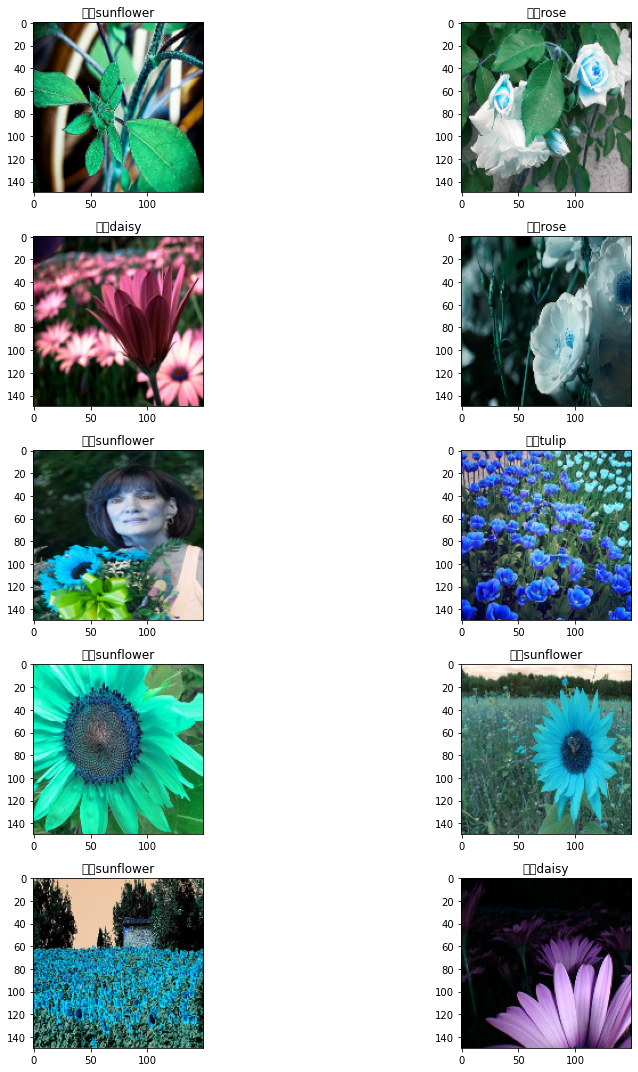

In [6]:
import matplotlib.pyplot as plt
import random as rdm # 导入随机数工具
# 随机显示图片
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range(2):
        r = rdm.randint(0, len(X))
        ax[i, j].imshow(X[r])
        ax[i, j].set_title('花：'+y_label[r])
plt.tight_layout()

In [7]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
from keras import layers # 导入所有层
from keras import models # 导入所有模型
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu',  # 卷积层
                                            input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu',))  # 卷积层
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu',))  # 卷积层
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='softmax')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
                        optimizer='RMSprop', # 优化器
                        metrics=['acc']) # 评估指标


In [10]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 

Epoch 1/10
66/66 [==============================] - 31s 474ms/step - loss: 1.3345 - acc: 0.4356 - val_loss: 1.0609 - val_acc: 0.4971
Epoch 2/10
66/66 [==============================] - 29s 441ms/step - loss: 1.0009 - acc: 0.5730 - val_loss: 1.4590 - val_acc: 0.4990
Epoch 3/10
66/66 [==============================] - 28s 430ms/step - loss: 0.8842 - acc: 0.6482 - val_loss: 1.0242 - val_acc: 0.6004
Epoch 4/10
66/66 [==============================] - 29s 444ms/step - loss: 0.8011 - acc: 0.6884 - val_loss: 0.9979 - val_acc: 0.5966
Epoch 5/10
66/66 [==============================] - 30s 451ms/step - loss: 0.7085 - acc: 0.7166 - val_loss: 1.5137 - val_acc: 0.5277
Epoch 6/10
66/66 [==============================] - 31s 462ms/step - loss: 0.6444 - acc: 0.7415 - val_loss: 0.8261 - val_acc: 0.6883
Epoch 7/10
66/66 [==============================] - 29s 446ms/step - loss: 0.5335 - acc: 0.7980 - val_loss: 1.1146 - val_acc: 0.5908
Epoch 8/10
66/66 [==============================] - 29s 439ms/step - 

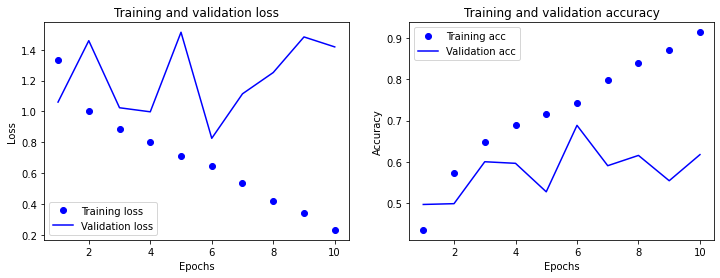

In [11]:
history = cnn.fit(X_train,y_train,epochs=10,validation_split=0.2)
show_history(history) # 调用这个函数